In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

In [11]:
samples_usco = np.load('data/usco_samples.npy')
samples_ucl = np.load('data/ucl_samples.npy')
samples_psceri = np.load('data/psceri_samples.npy')
samples_praesepe = np.load('data/pra_samples.npy')  #np.load('../../zeitsprung/data/abc_samples_slow.npy')
samples_ngc6811 = np.load('data/ngc6811_samples.npy')
samples_m67 = np.load('data/m67_samples.npy')

In [12]:
smamps_usco = np.load('../smamps/data/usco_amps.npy')
smamps_ucl = np.load('../smamps/data/ucl_amps.npy')
smamps_psceri = np.load('../smamps/data/psc_amps.npy')
smamps_praesepe = np.load('../smamps/data/pra_amps.npy') #np.loadtxt('../../zeitsprung/data/amps_slow.txt') / 100
smamps_ngc6811 = np.load('../smamps/data/ngc_amps.npy')
smamps_m67 = np.load('../smamps/data/m67_amps.npy')

In [13]:
samples = [samples_usco, samples_ucl, samples_psceri, samples_praesepe, samples_ngc6811, samples_m67]

from fleck import Star, generate_spots

ld = [0.5079, 0.2239]


In [14]:
names = ['USCO', 'UCL', 'Psc-Eri', 'Praesepe', 'NGC 6811', 'M67']

/Users/bmmorris/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bmmorris/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/bmmorris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


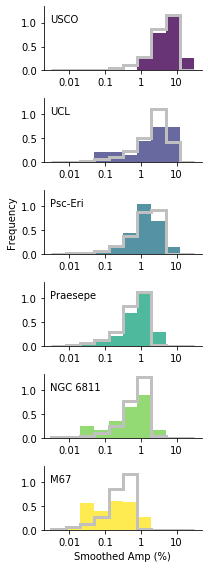

In [15]:
fig, ax = plt.subplots(6, 1, figsize=(3, 8), sharey=True)
props = dict(range=[-2.5, 1.5], bins=10, density=True)

alpha = 0.8
cmap = lambda x: plt.cm.viridis(x/5)

ax[0].hist(np.log10(smamps_usco) + 2, histtype='stepfilled', 
           color=cmap(0), alpha=alpha, **props)
ax[1].hist(np.log10(smamps_ucl) + 2, histtype='stepfilled', 
           color=cmap(1), alpha=alpha, **props)
ax[2].hist(np.log10(smamps_psceri) + 2, histtype='stepfilled', 
           color=cmap(2), alpha=alpha, **props)
ax[3].hist(np.log10(smamps_praesepe) + 2, histtype='stepfilled', 
           color=cmap(3), alpha=alpha, **props)
ax[4].hist(np.log10(smamps_ngc6811) + 2, histtype='stepfilled', 
           color=cmap(4), alpha=alpha, **props)
ax[5].hist(np.log10(smamps_m67) + 2, histtype='stepfilled', 
           color=cmap(5), alpha=alpha, **props)
ax[5].set_xlabel('Smoothed Amp (%)')


np.random.seed(0)

for i, s, name in zip(range(len(samples)), samples, names): 
#     min_lat, rspot, c = np.median(s, axis=0)
    max_lat, rspot, c = s[np.random.randint(0, len(s))]
    n_inclinations = 5000
    n_spots = 3
#     rads = rspot * np.ones((n_spots, n_inclinations))
#     #lats = (180*np.random.rand(n_spots, n_inclinations) - 90) * u.deg
#     lats = (2 * max_lat * np.random.rand(n_spots, n_inclinations) - 90) * u.deg
    lons, lats, rads, incs= generate_spots(min_latitude=-max_lat, max_latitude=max_lat, spot_radius=rspot, 
                                           n_spots=n_spots, n_inclinations=n_inclinations)
#     plt.hist(lats.value.ravel())
#     plt.show()
#     lons = 360 * np.random.rand(n_spots, n_inclinations) * u.deg
#     incs = (180*np.random.rand(n_inclinations) - 90) * u.deg
    stars = Star(spot_contrast=c, n_phases=30, u_ld=ld)
    lcs = stars.light_curve(lons, lats, rads, incs)

    ax[i].hist(np.log10(lcs.ptp(axis=0)) + 2, 
               histtype='step', lw=3, color='silver', **props)
    ax[i].annotate(name, (np.log10(0.003), 1.0), ha='left')
    
ax[2].set_ylabel('Frequency')
    
for axis in ax: 
    xticks = axis.get_xticks()
    axis.set_xticklabels(["{0:.2g}".format(10**xt) for xt in xticks])
    
fig.tight_layout()

for axis in ax: 
    for s in ['right', 'top']: 
        axis.spines[s].set_visible(False)
        
fig.savefig('plots/reproduce_smamps.pdf', bbox_inches='tight')